# <font color=maroon> Machine Learning Supervised Models</font>

<hr style="border:2px solid gray">

## <font color=blue>Table of Contents</font>
### 1. [Importing Libraries and Dataset](#Importing-Libraries-and-Dataset)
### 2. [Visualizing Pairwise Fisher Discriminant](#Visualizing-Pairwise-Fisher-Discriminant)
### 3. [Classification with PCA vs. FISHER using k-NN](#Classification-with-PCA-vs.-FISHER-using-k-NN)
### 4. [Parameter Sweep on k-NN](#Parameter-Sweep-on-k-NN)
### 5. [Parameter Sweep on Parzen Window](#Parameter-Sweep-on-Parzen-Window)
### 6. [SVM Classifier](#SVM-Classifier)
### 7. [Random Forrest](#Random-Forrest)
### 8. [1 vs Rest](#1-vs-Rest)
### 9. [Pairwise Classifier](#Pairwise-Classifier)

<hr style="border:2px solid gray">

## <font color=blue>Importing Libraries and Dataset</font>

In [72]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset

df = pd.read_csv('digit.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
# Checking for null values

df.isnull().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

In [5]:
# Splitting the data

df_X = df.drop(['label'], axis='columns', inplace=False) #Independent Variables
df_y = df['label'] #Dependent Variable

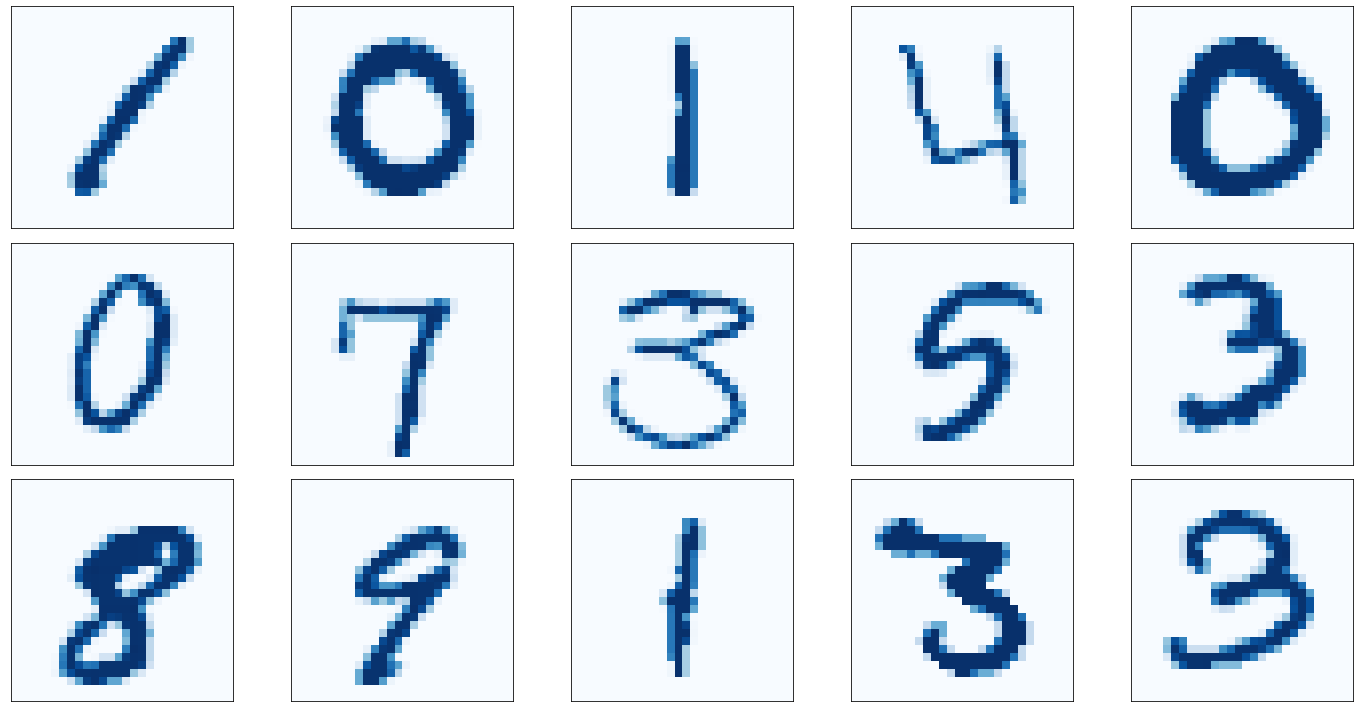

In [6]:
# Plotting digits

plt.figure(figsize=(20,10))
for digit in range(0,15):
    plt.subplot(3,5,digit+1)
    plt_data = df_X.iloc[digit].to_numpy().reshape(28,28)
    plt.imshow(plt_data,cmap='Blues')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

<hr style="border:2px solid gray">

## <font color=blue>Visualizing Pairwise Fisher Discriminant</font>

In [7]:
# Creating paired classes dataset

df_1 = pd.DataFrame()
for a in range(0,10,1):
    for b in range(0,10,1):
        class1= a
        class2= b
        
        if class1 != class2:
            df1 = df[(df['label']==class1) | (df['label']==class2)]
            
            #Calculating variance
            df1_var = df1.groupby('label').var().T
            df1_var.columns = ['var_0','var_1']

            #Calculating mean
            df1_mean = df1.groupby('label').mean().T
            df1_mean.columns = ['mean_0','mean_1']

            #Calculating the count
            c = list(df1.groupby('label').size())

            #Creating new dataset
            df_p= pd.concat([df1_mean, df1_var],axis=1)
            
            #calculating numerator as [mu(a)-mu(b)^2]
            df_p['num'] = (df_p['mean_0'] - df_p['mean_1'])**2
            
            #calculating denominator as [n(a)^2*sigma-a]+[n(b)^2*sigma-b]
            df_p['den'] = c[0]*df_p['var_0']**2 + c[1]*df_p['var_1']**2
            
            #Treat those Fisher values where total variance is zero as 0
            df_p['fisher'] = df_p.apply(lambda row: row['num']/row['den'] if row['den']!=0 else 0, axis=1)
            
            #Creating a dataset
            df_1[str(a)+str(b)]=df_p['fisher']
            
            #Transposing the data to get final dataset
            df_pf = df_1.T

In [8]:
df_pf.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Normalizing using Min-Max

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_pf_1 = pd.DataFrame(scaler.fit_transform(df_pf.values), columns=df_pf.columns, index=df_pf.index)
df_pf_1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.823551,1.000000,0.779817,0.410621,1.000000,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.823551,1.000000,0.779817,0.410621,1.000000,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.823551,1.000000,0.779817,0.410621,1.000000,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.722336,0.586932,0.251835,0.017043,0.090459,1.0,0.0,0.0,0.0,0.0


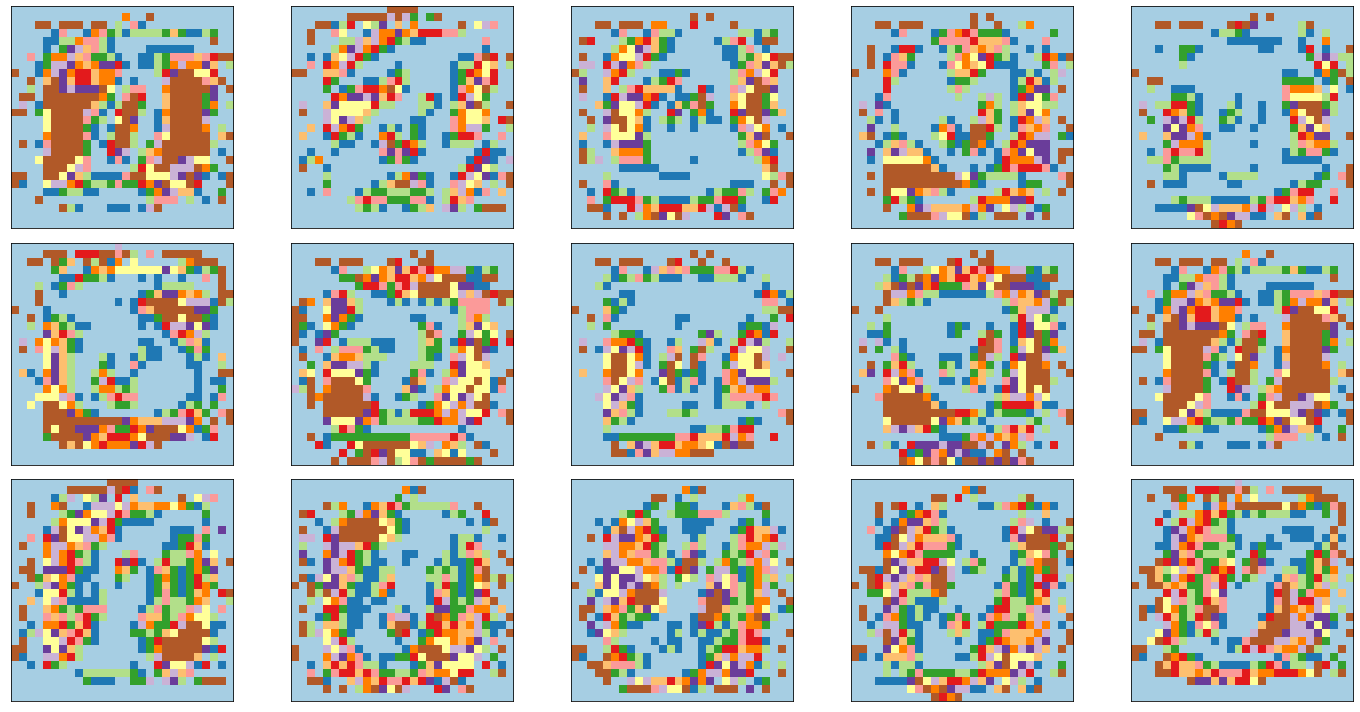

In [10]:
# Plotting pairwise fisher digits

plt.figure(figsize=(20,10))
for digit in range(0,15):
    plt.subplot(3,5,digit+1)
    plt_new_data = df_pf_1.iloc[digit].to_numpy().reshape(28,28)
    plt.imshow(plt_new_data, cmap='Paired')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

<hr style="border:2px solid gray">

## <font color=blue>Classification with PCA vs. FISHER using k-NN</font>

In [11]:
# Standardizing the independent variable dataset

df_2 = StandardScaler().fit_transform(df_X)

#### Applying PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)

#Applying PCA
pca.fit(df_2)

#Creating dataset
digitsPCA = pd.DataFrame(pca.transform(df_2), columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9'])

digitsPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-5.140477,-5.226401,3.886968,-0.901835,4.930451,2.034697,4.714727,-4.794059,0.228655
1,19.292332,6.033006,1.308149,-2.383342,3.095184,-1.790884,-3.772236,0.144483,-4.119611
2,-7.644503,-1.705818,2.289335,2.241214,5.094139,-4.151794,-1.014445,1.737249,0.442675
3,-0.474206,5.836165,2.008600,4.270954,2.378329,2.179571,4.400825,-0.364419,1.002433
4,26.559574,6.024811,0.933163,-3.012747,9.489504,-2.331337,-6.148686,-1.773074,-4.111371
...,...,...,...,...,...,...,...,...,...
41995,13.678849,-1.350398,-3.957303,-5.379358,10.874864,-5.104937,0.067189,-5.072437,-4.268309
41996,-8.869582,-1.187356,2.323172,1.528860,5.798873,-2.821725,-0.353185,0.526786,0.992958
41997,0.495391,7.076296,-12.089707,-3.223396,0.618133,0.330217,-2.127029,10.529966,-2.218368
41998,2.307240,-4.344518,0.699828,10.011083,-5.586160,-5.495257,0.192283,5.461777,2.197574


#### Applyin k-NN (k=5) on PCA data above

In [13]:
#Splitting the dataset into test(35%) and train(65%)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(digitsPCA, df_y, test_size=0.35, random_state=999)

In [14]:
#Applying k-NN classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca)
pca_train_score = knn.score(X_train_pca, y_train_pca)

print('The k-NN accuracy score for digitPCA train data is: ', round(pca_train_score*100,2),'%')

The k-NN accuracy score for digitPCA train data is:  91.65 %


In [15]:
#Fitting the model on test data

y_pred_pca = knn.predict(X_test_pca)
pca_test_score= knn.score(X_test_pca, y_test_pca)

print('The k-NN accuracy score for digitPCA test data is: ', round(pca_test_score*100,2),'%')

The k-NN accuracy score for digitPCA test data is:  88.16 %


#### Applying Fisher

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Applying Fisher Discriminant
lda = LDA(n_components = 9)
lda.fit(df_2, df_y)

#Creating dataset
digitsFISHER = pd.DataFrame(lda.transform(df_2),columns=['LDA1','LDA2','LDA3','LDA4','LDA5','LDA6','LDA7','LDA8','LDA9'])
digitsFISHER

,LDA1,LDA2,LDA3,LDA4,LDA5,LDA6,LDA7,LDA8,LDA9
0,0.706982,3.702191,-0.546160,1.083590,-1.282057,-0.640238,-0.161646,0.711746,0.098052
1,-4.753373,-3.257093,-2.983682,-1.244001,-1.880934,-0.898564,0.114414,-1.097409,1.235790
2,0.426475,5.168707,-0.215028,0.248895,-3.737808,0.168903,0.546867,0.164058,-0.314798
3,-0.978410,-0.555503,1.147945,-0.324528,-0.997568,-0.858390,0.979497,1.846044,-0.207963
4,-4.878184,-3.244367,-4.723876,-0.850046,-1.923177,-2.093587,0.166724,-2.228554,0.999328
...,...,...,...,...,...,...,...,...,...
41995,-2.846328,-1.655570,-3.661467,0.658924,-1.528190,-0.680945,0.511808,-1.606290,-1.122931
41996,1.776876,4.591485,-0.370188,0.200660,-2.247352,-0.005172,1.093822,-0.204246,-0.427021
41997,3.078790,-2.807856,-3.082087,-2.657304,-1.939725,2.647739,-2.012444,0.094553,-0.028155
41998,-2.901593,-1.216585,4.178510,-1.426573,-1.557683,2.061918,1.035576,0.932003,-0.135465


#### Applying k-NN (k=5) on FISHER data above

In [17]:
#Splitting the dataset into test(35%) and train(65%)

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(digitsFISHER, df_y, test_size=0.35, random_state=999)

In [18]:
#Applying k-NN classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train_lda)
lda_train_score = knn.score(X_train_lda, y_train_lda)

print('The k-NN accuracy score for digitFISHER train data is: ', round(lda_train_score*100,2),'%')

The k-NN accuracy score for digitFISHER train data is:  93.78 %


In [19]:
#Fitting the model on test data

y_pred_lda = knn.predict(X_test_lda)
lda_test_score= knn.score(X_test_lda, y_test_lda)

print('The k-NN accuracy score for digitFISHER test data is: ', round(lda_test_score*100,2),'%')

The k-NN accuracy score for digitFISHER test data is:  91.82 %


#### Conclusion

In [20]:
data_s = [['digitsPCA',91.64,88.12],['digitsFISHER',93.78,91.82]]
df_scores = pd.DataFrame(data_s, columns=['Data','Train Accuracy', 'Test Accuracy'])
df_scores

,Data,Train Accuracy,Test Accuracy
0,digitsPCA,91.64,88.12
1,digitsFISHER,93.78,91.82


### <font color=dark>As we can see from above table the Test Accuracy for both datasets is less than the train accuracy. Also, the Train and Test accuracy for digitFISHER data is better than digitPCA, hence, we can conclude that applying k-NN classifier using FISHER discriminant is better fit model.</font>

<hr style="border:2px solid gray">

## <font color=blue>Parameter Sweep on k-NN</font>

In [21]:
#Defining hyperparameters

neighbors = [1, 3, 5, 7, 9, 11, 13, 15]

In [22]:
#Splitting the data

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(digitsFISHER, df_y, test_size=0.35, random_state=1000)

In [23]:
#Building k-NN for define hyperparameters

k1 = []
k2 = []
k3 = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_knn, y_train_knn)
    train_s= round(knn.score(X_train_knn, y_train_knn)*100,4)
    test_s = round(knn.score(X_test_knn, y_test_knn)*100,4)
    k1.append(n)
    k2.append(train_s)
    k3.append(test_s)
    
df_knn_scores = pd.DataFrame({'k-NN Neighbors': k1, 'Train Accuracy' : k2,  'Test Accuracy': k3})
df_knn_scores

,k-NN Neighbors,Train Accuracy,Test Accuracy
0,1,100.0000,89.8095
1,3,94.6264,91.1837
2,5,93.8571,91.3265
3,7,93.2747,91.4830
4,9,93.0037,91.5442
5,11,92.6777,91.5510
6,13,92.5128,91.5510
7,15,92.4176,91.4966


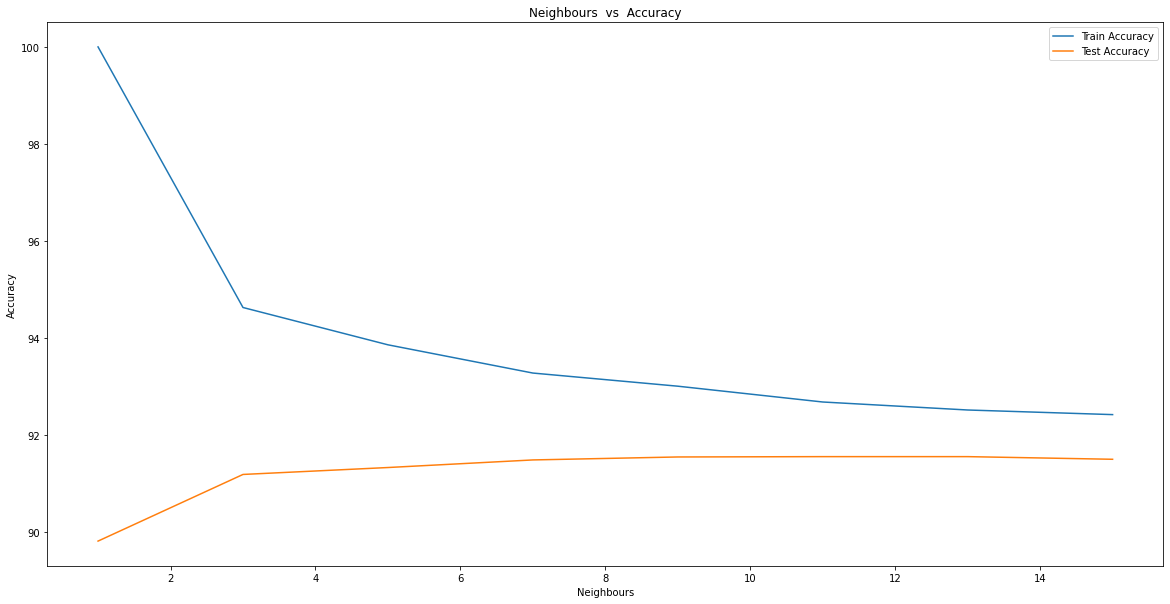

In [24]:
#Plotting accuracy for each K

plt.figure(figsize=(20,10))
plt.plot(df_knn_scores['k-NN Neighbors'], df_knn_scores['Train Accuracy'], label = "Train Accuracy")
plt.plot(df_knn_scores['k-NN Neighbors'], df_knn_scores['Test Accuracy'], label = "Test Accuracy")
plt.title("Neighbours  vs  Accuracy")
plt.xlabel("Neighbours")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color=dark>From above table and graph it is evident, that the test accuracy is almost approx near to 90% for each k but the train accuracy is 100% for k=1, thus, the optimal value of k is 1.</font>

<hr style="border:2px solid gray">

## <font color=blue>Parameter Sweep on Parzen Window</font>

In [25]:
#Splitting the data

X_train_pw, X_test_pw, y_train_pw, y_test_pw = train_test_split(digitsFISHER, df_y, test_size=0.35, random_state=1000)

In [26]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

class KDEClassifier(BaseEstimator, ClassifierMixin):
   
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]


In [27]:
#Parzen Window classifier
sigma = list(range(1,11,1))

pw = GridSearchCV(KDEClassifier(), {'bandwidth': sigma},scoring='accuracy',return_train_score=True)
pw.fit(X_train_pw, y_train_pw)

GridSearchCV(estimator=KDEClassifier(),
             param_grid={'bandwidth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy')

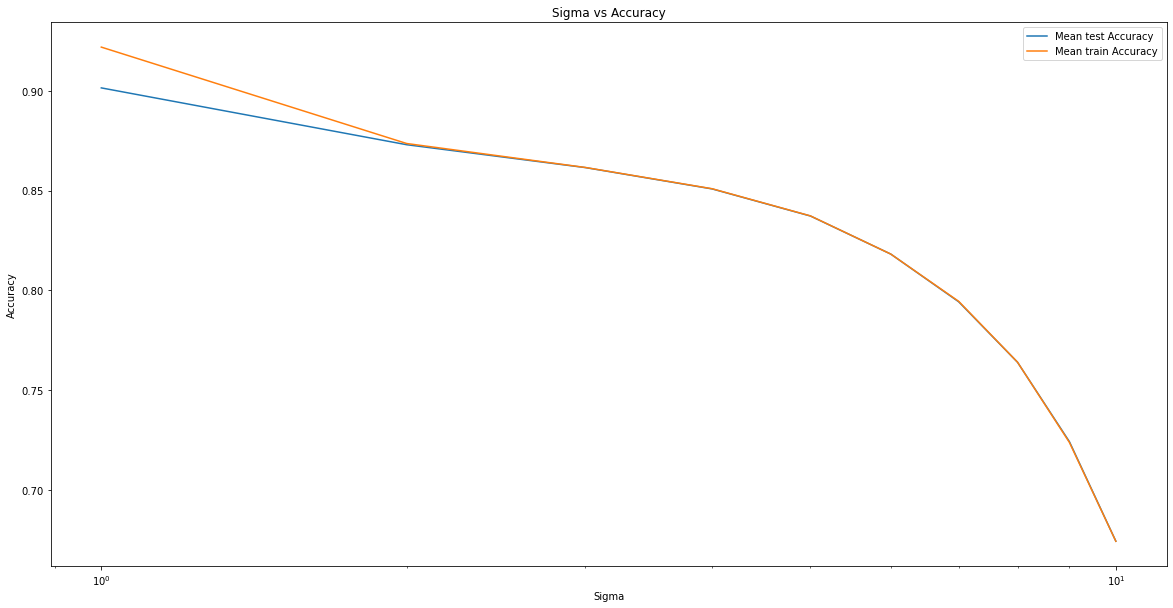

In [28]:
#Plotting Accuracy for each sigma

test_s1 = [val for val in pd.DataFrame(pw.cv_results_).mean_test_score]
train_s1 = [val for val in pd.DataFrame(pw.cv_results_).mean_train_score]

plt.figure(figsize=(20,10))
plt.semilogx(sigma, test_s1, label = 'Mean test Accuracy')
plt.semilogx(sigma, train_s1, label = 'Mean train Accuracy')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Sigma vs Accuracy')
plt.legend()
plt.show()

In [31]:
print('The most optimal sigma is:', pw.best_params_)
print('Best accuracy=', round(pw.best_score_*100,2),'%')

The most optimal sigma is: {'bandwidth': 1}
Best accuracy= 90.15 %


### <font color=dark>From the graph above and the best accuracy score, it is evident that the most optimal sigma value is 1, with accuracy of 90.15%</font>

<hr style="border:2px solid gray">

## <font color=blue>SVM Classifier</font>

In [51]:
#Creating function for selecting two classes 

d1 = pd.DataFrame(df['label']) #Making dataframe of just Label column from original dataset

digitsFISHER1 = digitsFISHER.join(d1)

def df_5(c1,c2):
    df_filter = digitsFISHER1[(digitsFISHER1['label']==c1) | (digitsFISHER1['label']==c2)]
    return df_filter

In [52]:
df_filter = df_5(7,3)

In [53]:
df_filter

,LDA1,LDA2,LDA3,LDA4,LDA5,LDA6,LDA7,LDA8,LDA9,label
6,3.571182,-1.993637,-1.243564,-2.005375,-0.940958,1.258026,-0.724028,1.049958,0.524257,7
7,1.786992,-0.490266,-2.447929,-1.128078,1.644508,0.950142,0.325314,-1.610156,-2.957273,3
9,-0.823351,1.403696,-2.707394,-2.406036,1.684827,1.081896,2.809492,-0.987680,0.347284,3
13,0.201254,1.233330,-2.921603,0.034247,2.262349,2.891313,0.965721,-0.781327,4.598813,3
14,-0.916921,0.619597,-0.688792,-1.584756,2.609008,1.029770,1.797503,-2.018756,1.184121,3
...,...,...,...,...,...,...,...,...,...,...
41983,3.015499,-1.206026,-1.656014,-3.073654,-0.785014,-0.066359,0.110462,0.741966,3.344444,7
41984,1.840101,1.241693,-1.783415,-1.074795,3.705842,-1.039174,-1.714752,0.169259,1.645343,3
41985,0.408757,0.909496,-2.582751,-0.135785,1.194841,2.049814,1.339077,-1.324565,-0.052610,3
41990,-0.044435,1.932513,-1.590922,0.067573,2.387604,0.904749,1.030103,-0.504309,0.706066,3


In [54]:
#Creating Dependent & Independent variables

X5 = df_filter.drop(['label'], axis='columns', inplace=False) #Independent Variables
y5 = df_filter['label'] #Dependent Variable

In [55]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.35, random_state=10000)

#### Linear SVM

In [56]:
from sklearn.svm import SVC
from sklearn import metrics

sigma1=list(range(1,50,2))
l1=[]
l2=[]
l3=[]
l4=[]

for i in sigma1:
    svm_linear = SVC(kernel='linear',C=i)
    
    #Fitting Linear SVM model
    svm_linear.fit(X_train, y_train)
    y_pred1 = svm_linear.predict(X_train)
    train_s2=round(accuracy_score(y_train, y_pred1)*100,2)
    support_vector_train= len(svm_linear.support_)
    y_pred = svm_linear.predict(X_test)
    test_s2=round(accuracy_score(y_test, y_pred)*100,2)
    l1.append(i)
    l2.append(train_s2)
    l3.append(test_s2)
    l4.append(support_vector_train)

df_lsvm = pd.DataFrame({'C': l1, 'Train Accuracy' : l2,  'Test Accuracy': l3, 'Support Vector length' : l4})
df_lsvm

,C,Train Accuracy,Test Accuracy,Support Vector length
0,1,97.77,97.78,342
1,3,97.77,97.78,341
2,5,97.77,97.78,341
3,7,97.77,97.78,341
4,9,97.77,97.81,340
5,11,97.77,97.81,340
6,13,97.77,97.81,340
7,15,97.77,97.81,340
8,17,97.77,97.81,340
9,19,97.77,97.81,340


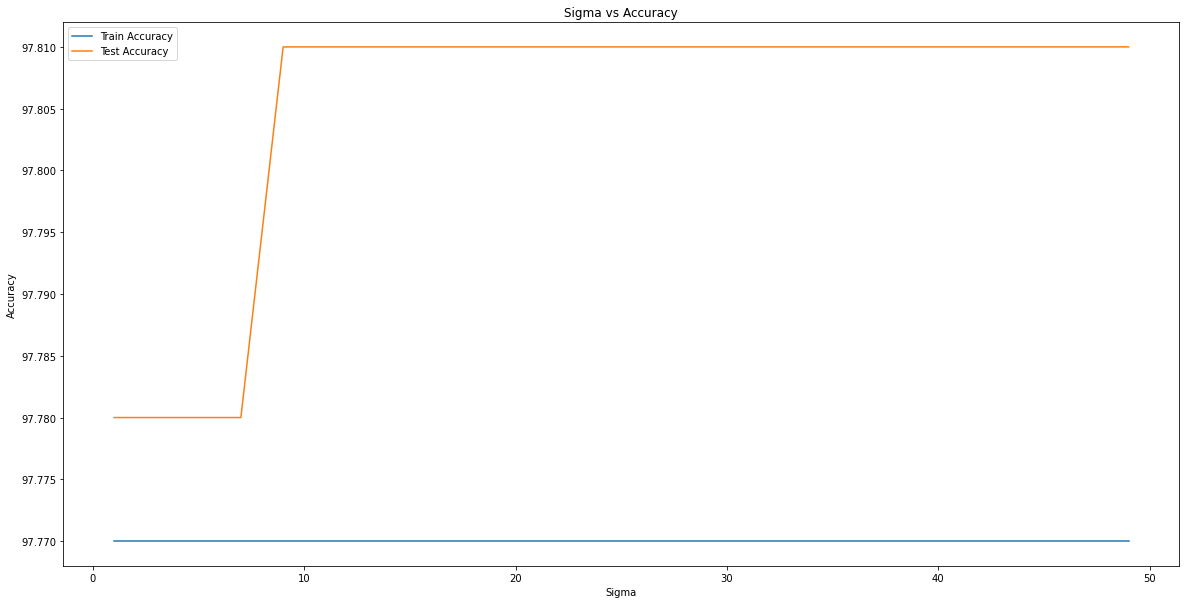

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df_lsvm.C, df_lsvm['Train Accuracy'], label = "Train Accuracy")
plt.plot(df_lsvm.C, df_lsvm['Test Accuracy'], label = "Test Accuracy")
plt.title("Sigma vs Accuracy")
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color=dark>As the complexity increases for linear SVM, we observe that the Train and Test accuracy and number of support vectors are almost constant.</font>

#### Polynomial SVM

In [62]:
sigma2=[2,3,4,5]
p1 = []
p2 = []
p3 = []
p4 = []

for i in sigma2:
    svm_poly = SVC(kernel='poly',degree=i) 
    

    ##Fitting Polynomial SVM model
    svm_poly.fit(X_train, y_train)
    y_pred1 = svm_poly.predict(X_train)
    train_s3 = round(accuracy_score(y_train, y_pred1)*100,2)
    support_vector_train_psvm = len(svm_poly.support_)
    y_pred = svm_poly.predict(X_test)
    test_s3 =round(accuracy_score(y_test, y_pred)*100,2)
    p1.append(i)
    p2.append(train_s3)
    p3.append(test_s3)
    p4.append(support_vector_train_psvm)

df_psvm = pd.DataFrame({'D': p1, 'Train Accuracy' : p2,  'Test Accuracy': p3, 'Support Vector Length' : p4})
df_psvm

,D,Train Accuracy,Test Accuracy,Support Vector Length
0,2,97.40,97.19,648
1,3,98.05,98.04,683
2,4,96.55,95.92,1067
3,5,95.08,94.75,1225


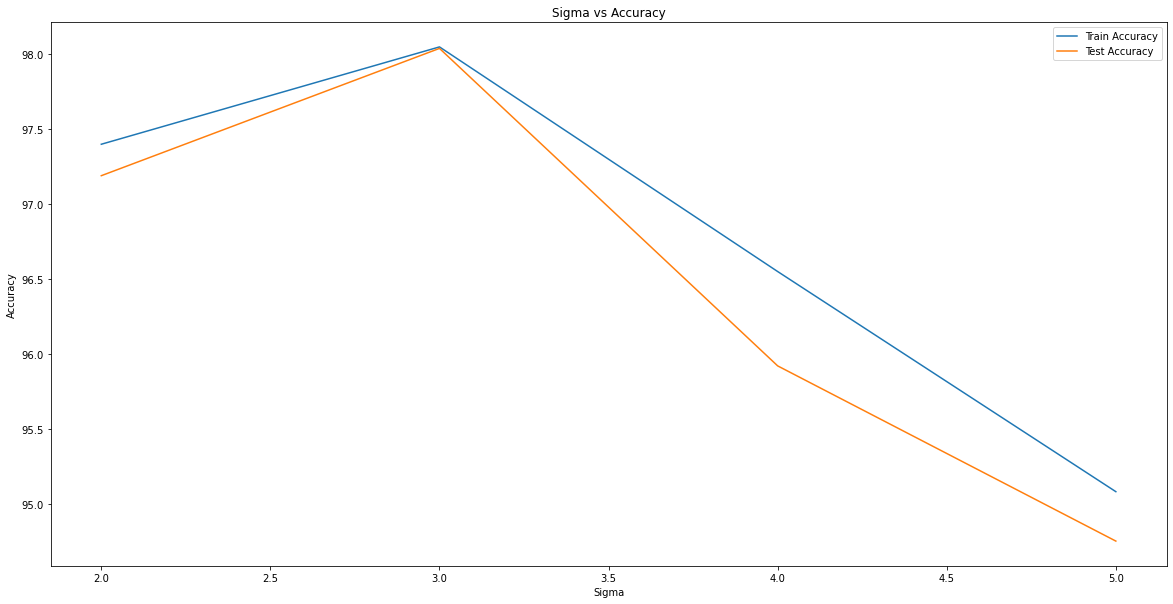

In [63]:
plt.figure(figsize=(20,10))
plt.plot(df_psvm.D, df_psvm['Train Accuracy'], label = "Train Accuracy")
plt.plot(df_psvm.D, df_psvm['Test Accuracy'], label = "Test Accuracy")
plt.title("Sigma vs Accuracy")
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color=dark>The otpimal value for C is 3. As the complexity increases for polynomial SVM, we observe that the Train and Test accuracy decreases after the optimal value of C=3 and number of support vectors increases with increase in complexity.</font>

#### RBF Classifier

In [64]:
sigma3=list(range(1,11,1))
r1 = []
r2 = []
r3 = []
r4 = []

for i in sigma3:
    svm_rbf = SVC(kernel='rbf',degree=i) 
    

    ##Fitting RBF classifier model
    svm_rbf.fit(X_train, y_train)
    y_pred1 = svm_rbf.predict(X_train)
    train_s4 = round(accuracy_score(y_train, y_pred1)*100,2)
    support_vector_train_rbf = len(svm_rbf.support_)
    y_pred = svm_rbf.predict(X_test)
    test_s4 =round(accuracy_score(y_test, y_pred)*100,2)
    r1.append(i)
    r2.append(train_s4)
    r3.append(test_s4)
    r4.append(support_vector_train_rbf)

df_rbf = pd.DataFrame({'Sigma': r1, 'Train Accuracy' : r2,  'Test Accuracy': r3, 'Support Vector Length' : r4})
df_rbf

,Sigma,Train Accuracy,Test Accuracy,Support Vector Length
0,1,98.47,98.47,374
1,2,98.47,98.47,374
2,3,98.47,98.47,374
3,4,98.47,98.47,374
4,5,98.47,98.47,374
5,6,98.47,98.47,374
6,7,98.47,98.47,374
7,8,98.47,98.47,374
8,9,98.47,98.47,374
9,10,98.47,98.47,374


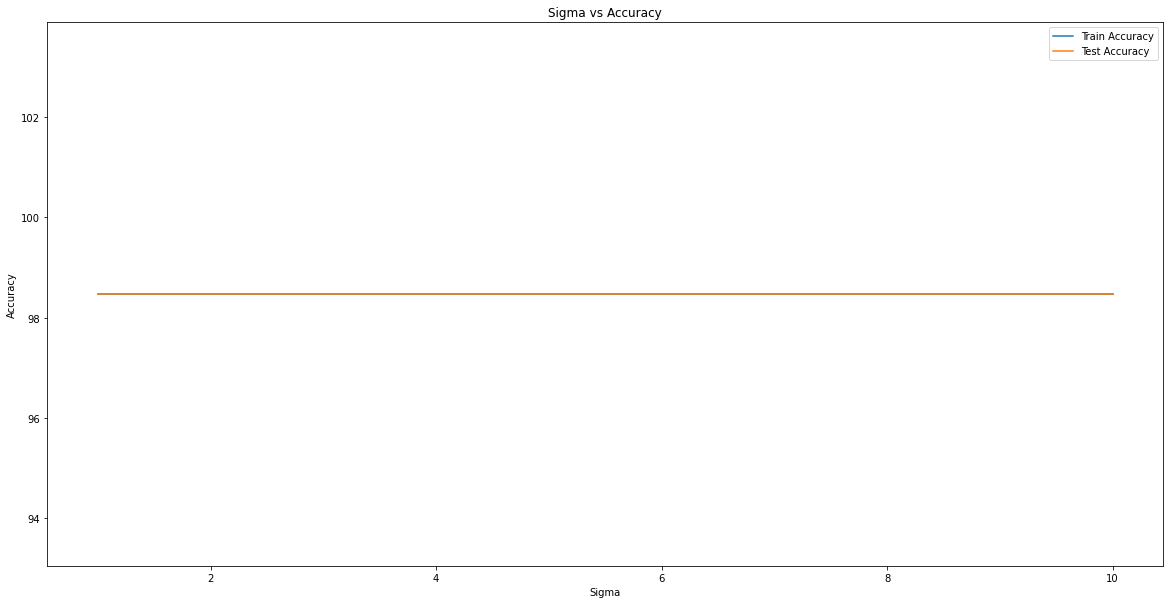

In [65]:
plt.figure(figsize=(20,10))
plt.plot(df_rbf.Sigma, df_rbf['Train Accuracy'], label = "Train Accuracy")
plt.plot(df_rbf.Sigma, df_rbf['Test Accuracy'], label = "Test Accuracy")
plt.title("Sigma vs Accuracy")
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color=dark>As the complexity increases for linear SVM, we observe that the Train and Test accuracy and number of support vectors are almost constant.</font>

<hr style="border:2px solid gray">

## <font color=blue>Random Forrest</font>

In [66]:
# Recalling our function in last question
df_filter = df_5(7,3)
df_filter

,LDA1,LDA2,LDA3,LDA4,LDA5,LDA6,LDA7,LDA8,LDA9,label
6,3.571182,-1.993637,-1.243564,-2.005375,-0.940958,1.258026,-0.724028,1.049958,0.524257,7
7,1.786992,-0.490266,-2.447929,-1.128078,1.644508,0.950142,0.325314,-1.610156,-2.957273,3
9,-0.823351,1.403696,-2.707394,-2.406036,1.684827,1.081896,2.809492,-0.987680,0.347284,3
13,0.201254,1.233330,-2.921603,0.034247,2.262349,2.891313,0.965721,-0.781327,4.598813,3
14,-0.916921,0.619597,-0.688792,-1.584756,2.609008,1.029770,1.797503,-2.018756,1.184121,3
...,...,...,...,...,...,...,...,...,...,...
41983,3.015499,-1.206026,-1.656014,-3.073654,-0.785014,-0.066359,0.110462,0.741966,3.344444,7
41984,1.840101,1.241693,-1.783415,-1.074795,3.705842,-1.039174,-1.714752,0.169259,1.645343,3
41985,0.408757,0.909496,-2.582751,-0.135785,1.194841,2.049814,1.339077,-1.324565,-0.052610,3
41990,-0.044435,1.932513,-1.590922,0.067573,2.387604,0.904749,1.030103,-0.504309,0.706066,3


In [67]:
#Splitting the data

X6 = df_filter.drop(['label'], axis='columns', inplace=False) #Independent Variables
y6 = df_filter['label'] #Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.35, random_state=10000)

In [68]:
# Fitting the Decision Tree model

from sklearn.ensemble import RandomForestClassifier

estimator=list(range(5,101,5))
depth= list(range(2,9,1))

t1=[]
t2=[]
t3=[]
t4=[]


for i in estimator:
    for j in depth:
        forest = RandomForestClassifier(n_estimators=i, max_depth= j)
        forest.fit(X_train, y_train)
        y_pred1 = forest.predict(X_train)
        train_s5=round(accuracy_score(y_train, y_pred1)*100,2)
        y_pred = forest.predict(X_test)
        test_s5=round(accuracy_score(y_test, y_pred)*100,2)
        t1.append(i)
        t2.append(j)
        t3.append(train_s5)
        t4.append(test_s5)
        
df_dt = pd.DataFrame({'Estimator': t1, 'Depth' : t2,  'Train Accuracy': t3, 'Test Accuracy' : t4})
df_dt

,Estimator,Depth,Train Accuracy,Test Accuracy
0,5,2,95.71,95.92
1,5,3,96.71,96.74
2,5,4,97.35,96.87
3,5,5,97.87,97.19
4,5,6,98.42,97.36
...,...,...,...,...
135,100,4,97.77,97.42
136,100,5,98.38,97.75
137,100,6,98.82,98.07
138,100,7,99.26,98.04


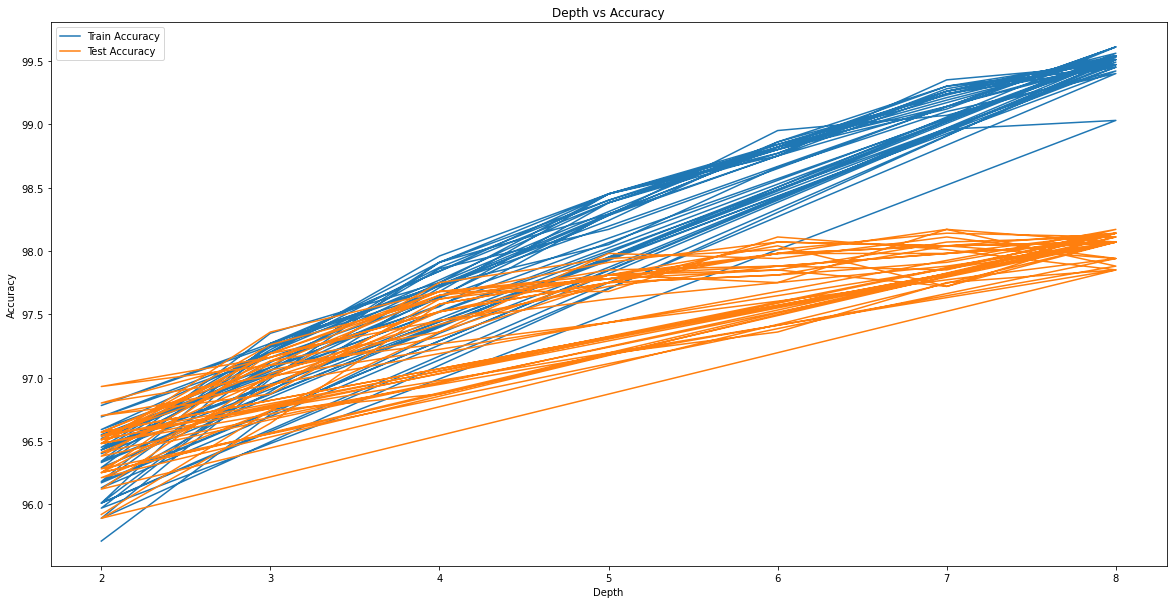

In [69]:
plt.figure(figsize=(20,10))
plt.plot(df_dt.Depth, df_dt['Train Accuracy'], label = "Train Accuracy")
plt.plot(df_dt.Depth, df_dt['Test Accuracy'], label = "Test Accuracy")
plt.title("Depth vs Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

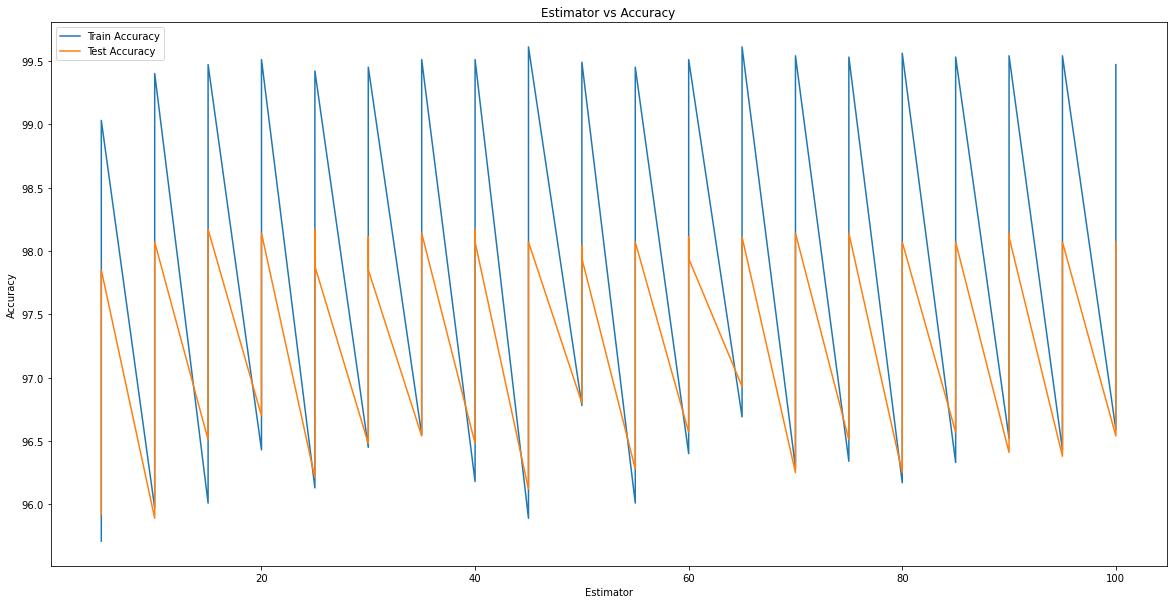

In [70]:
plt.figure(figsize=(20,10))
plt.plot(df_dt.Estimator, df_dt['Train Accuracy'], label = "Train Accuracy")
plt.plot(df_dt.Estimator, df_dt['Test Accuracy'], label = "Test Accuracy")
plt.title("Estimator vs Accuracy")
plt.xlabel("Estimator")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color=dark>For a particular depth the increase in estimator gives increase in accuracy, but as the depth increases simultaneaously, the accuracy after certain point decreases and then increases, basically, the accuracy toggles and thus we have a balance trade-off between depth an estimators.</font>

<hr style="border:2px solid gray">

## <font color=blue>1-vs-Rest</font>

In [71]:
#Creating a function for getting desired dataset

def df_7(c1 = range(0,9)):
    df_t1 = digitsFISHER1[(digitsFISHER1['label']==c1)]
    df_t2 = digitsFISHER1[(digitsFISHER1['label']!=c1)]
    df_t3 = df_t2.groupby('label').apply(lambda x: x.sample(frac=0.2))
    df_r = df_t1.append(df_t3)
    df_r = df_r.reset_index()
    df_r = df_r.drop('index', axis=1)
    return df_r

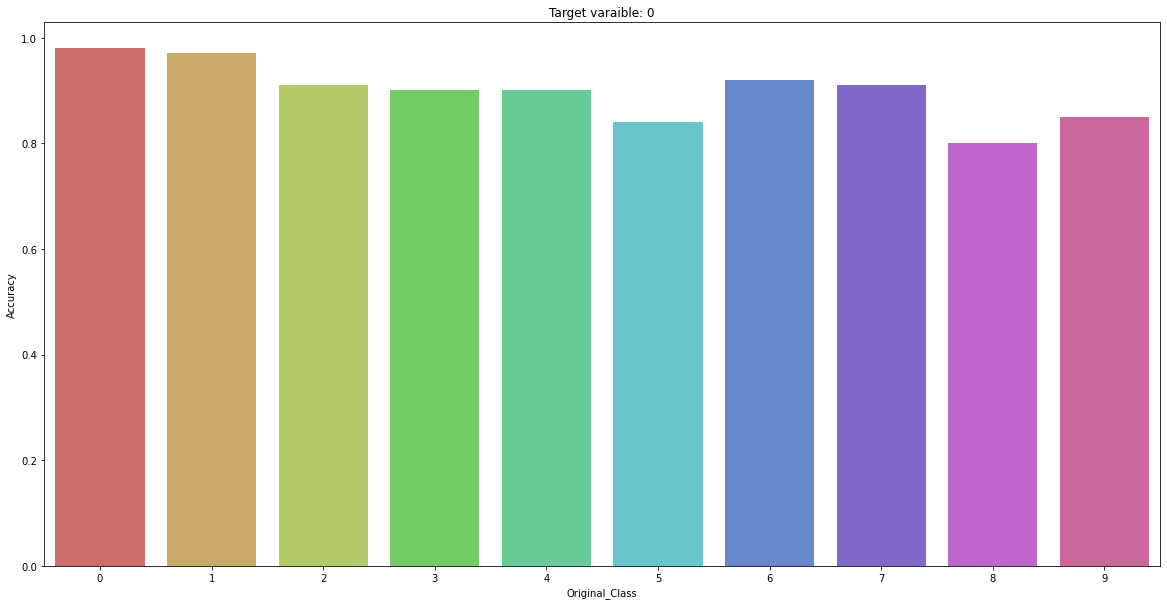

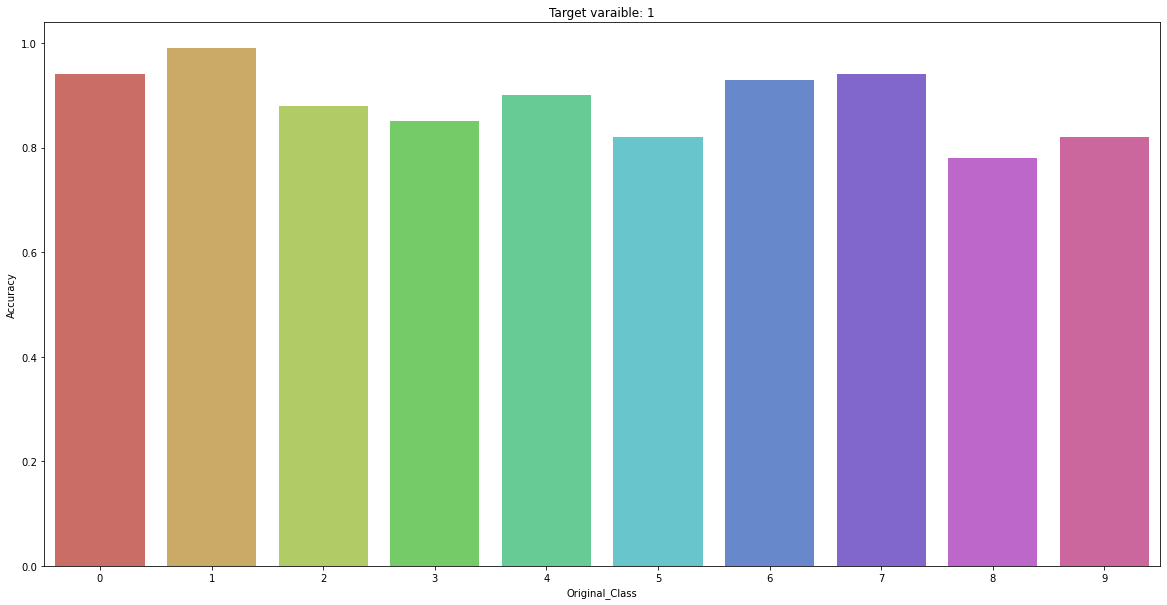

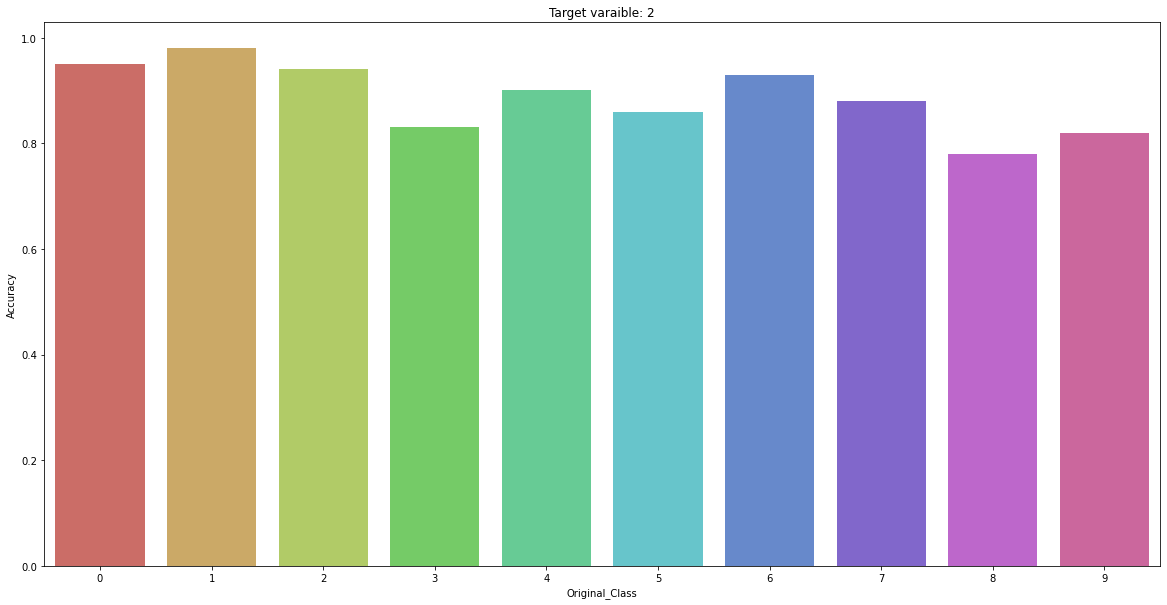

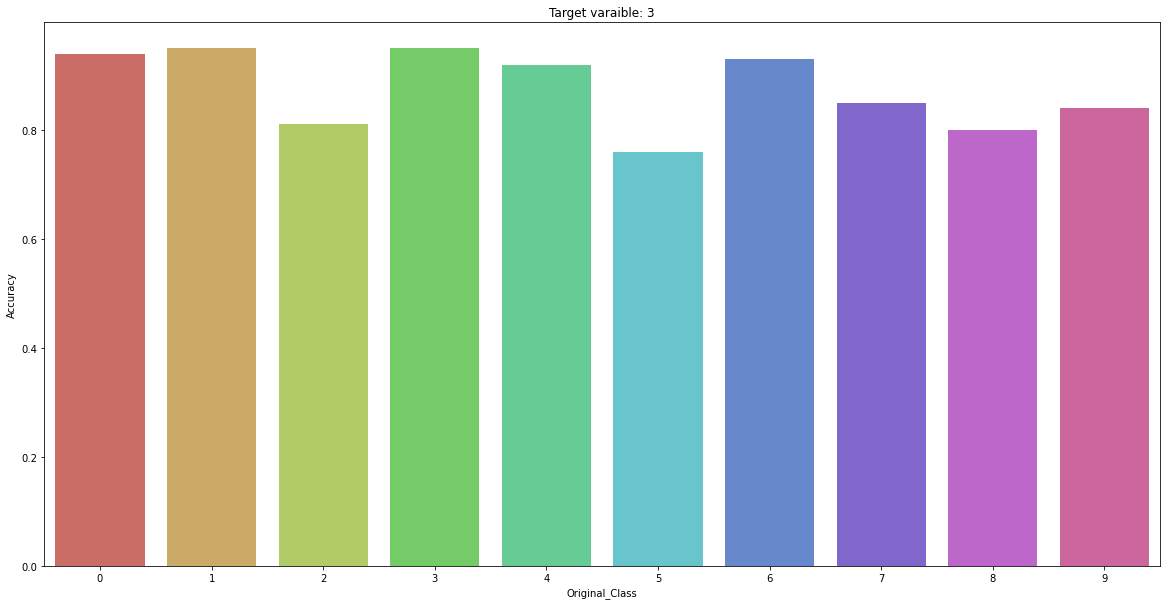

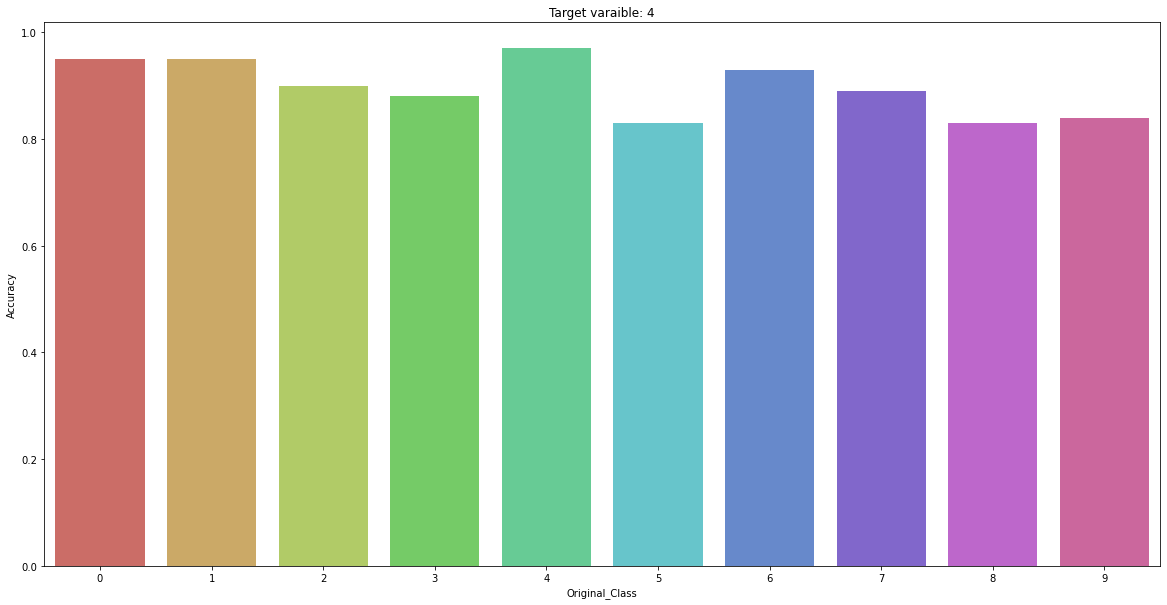

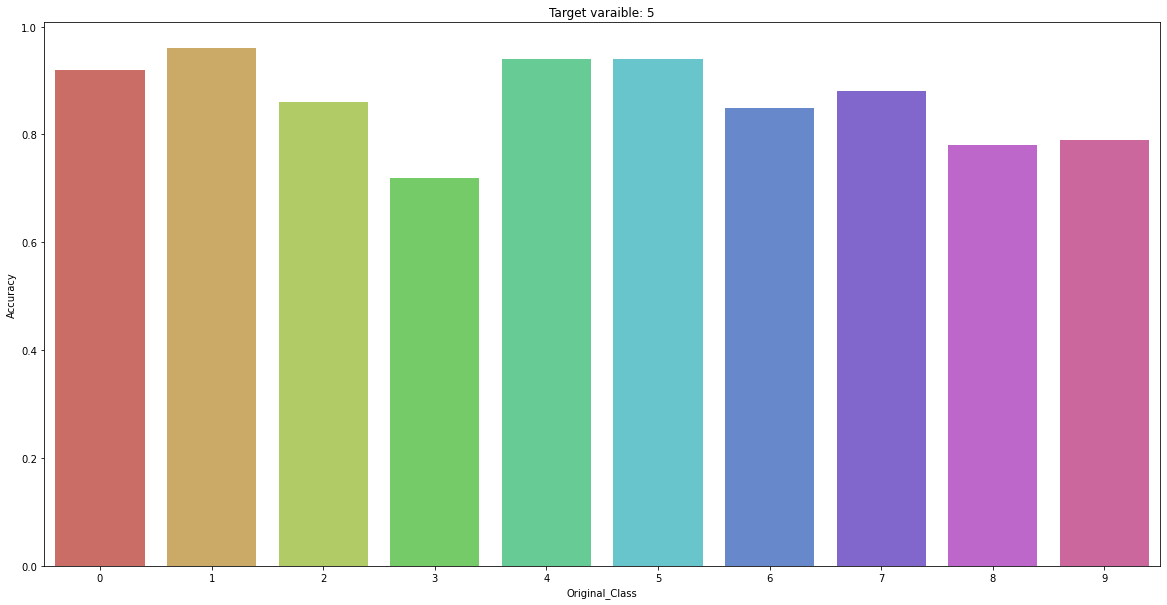

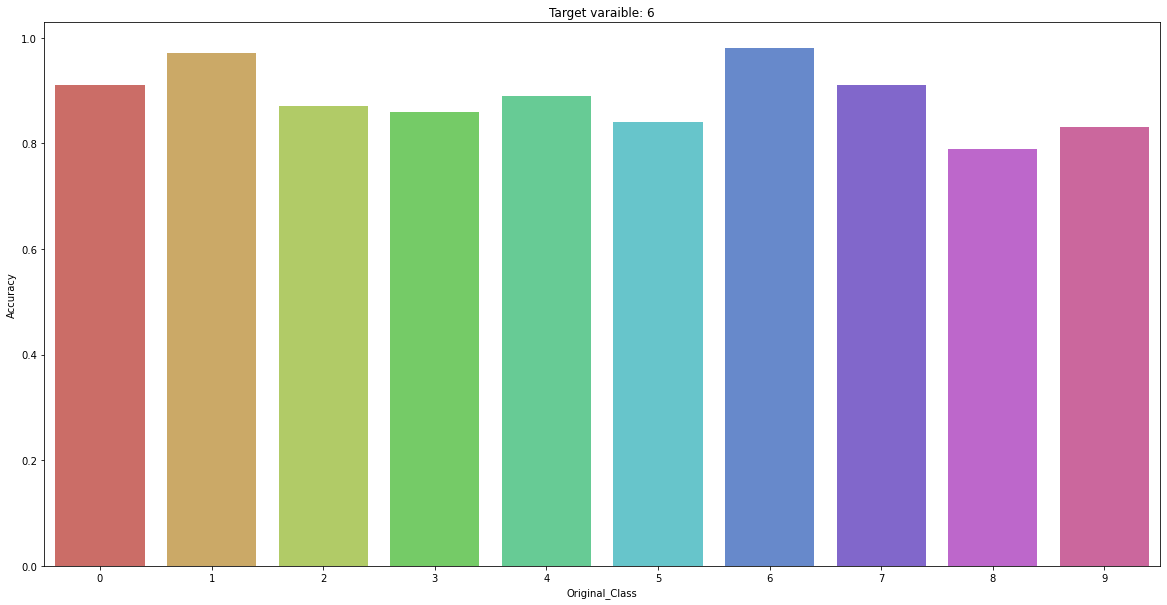

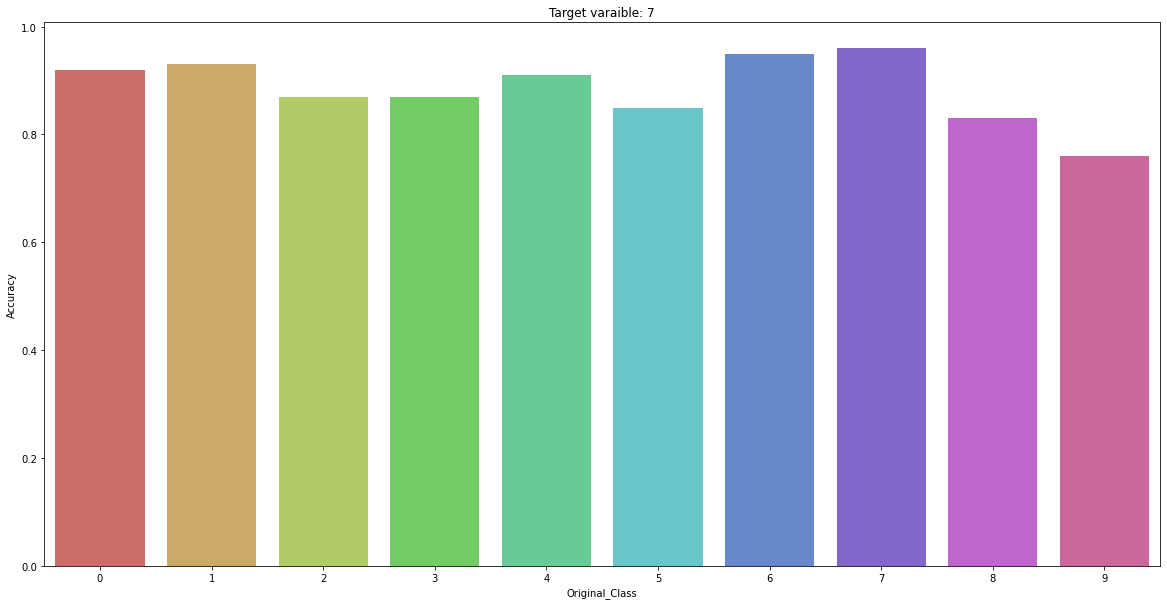

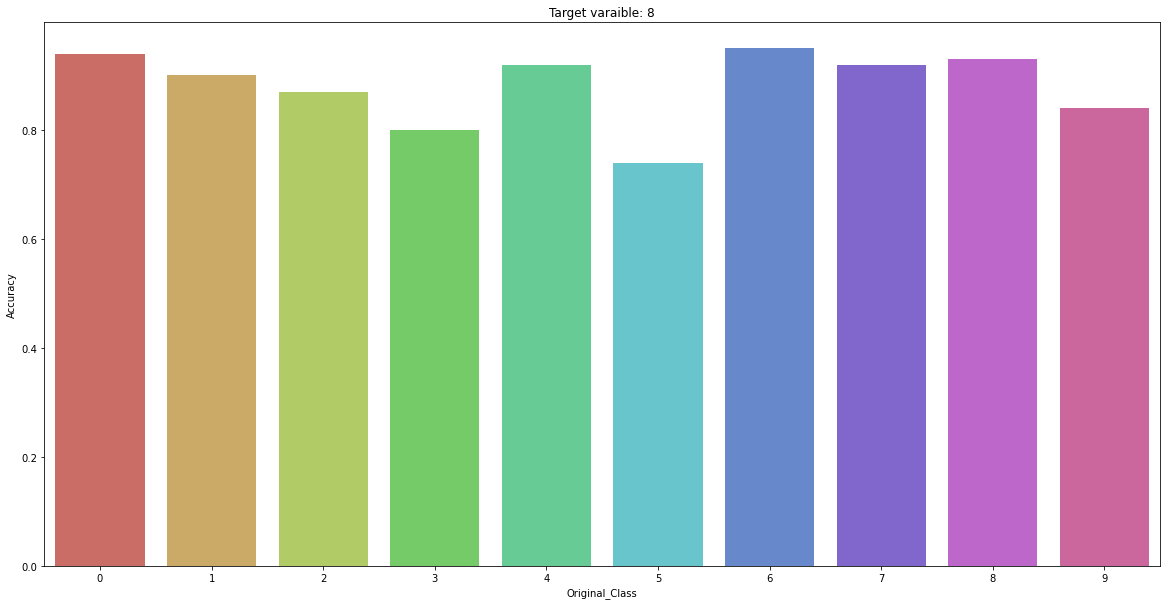

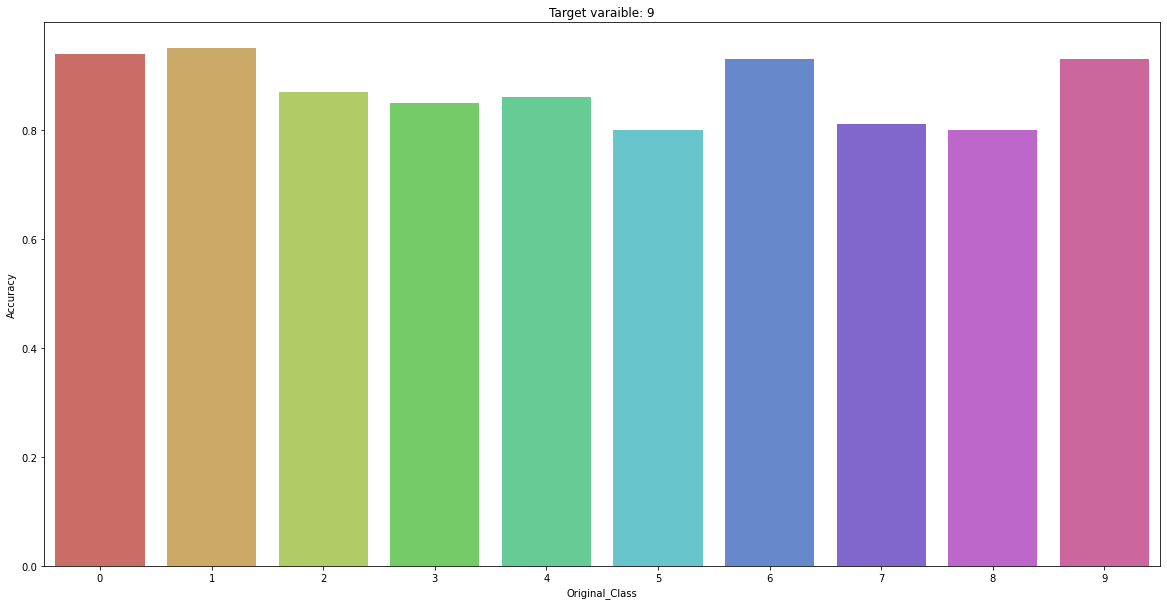

In [74]:
#Creating desired bar plots

for n in range(0,10,1):
    df_rest = df_7(n)
    df_rest.groupby('label').size()
    
    X7= df_rest.drop(['label'], axis='columns', inplace=False)
    y7= df_rest.iloc[:,-1:]
    
    #Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X7, y7, test_size=0.30, random_state=100,shuffle=True)
    
    #Fitting Linear SVM
    svm7 = SVC(C=3, kernel = 'linear')
    svm7.fit(X_train, y_train)
    y_pred1 = svm7.predict(X_train)
    y_pred = svm7.predict(X_test)
    
    # Creating confusion matrix to get accuracy of each label(class)
    b= confusion_matrix(y_test, y_pred, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    df_o = pd.DataFrame({'Original_Class' : y_test.label}).reset_index()
    Original_Class = df_o.groupby('Original_Class').size().to_frame(name='Count').reset_index()
    truepos = np.diag(b)
    Original_Class['Predicted Count'] = truepos
    Original_Class['Accuracy']=np.where(Original_Class['Predicted Count'] >= Original_Class['Count'], 1,round(Original_Class['Predicted Count']/Original_Class['Count'],2))
    plt.figure(figsize = (20,10))
    dd= "Target varaible: " + str(n);
    sns.barplot(data = Original_Class, x = Original_Class['Original_Class'], y = Original_Class['Accuracy'],palette = "hls").set(title=dd)

### <font color=dark>The barplots clearly show the difference between accuracy for 1 class vs the rest, and class 1 seems to be has the best accuracy vs the rest.</font>

<hr style="border:2px solid gray">

## <font color=blue>Pair-wise Classifier</font>

In [92]:
y = df['label']
X = df.iloc[:,1:]

# Creating function for getting top 30 dimensions

def Top30(X,y,class1,class2):
    
    X1 = X[y==class1]
    X2 = X[y==class2]
   
    
    feature_count = X.shape[1]
    
    #Calculating entire means
    mean_all = np.mean(X,axis=0)
    
    # Calculating b/w class & withing class matrices
    between_class_scatter, within_class_scatter = np.zeros((feature_count,feature_count)),np.zeros((feature_count,feature_count))
    
    #mean of each class for each dimension
    mean_X1 = np.mean(X1,axis=0)
    mean_X2 = np.mean(X2,axis=0)

    within_class_scatter = np.dot((X1-mean_X1).T,((X1-mean_X1))) + np.dot((X2-mean_X2).T,((X2-mean_X2))) 
    
    
    x1_mean_minus_overall_mean=(mean_X1-mean_all).reshape(feature_count,1)
    x2_mean_minus_overall_mean=(mean_X2-mean_all).reshape(feature_count,1)
    
    
    between_class_scatter = X1.shape[0]*np.dot(x1_mean_minus_overall_mean,x1_mean_minus_overall_mean.T) + \
    X2.shape[0]*np.dot(x2_mean_minus_overall_mean,x2_mean_minus_overall_mean.T)
    
    
    mat_trans=np.dot(np.linalg.pinv(within_class_scatter),between_class_scatter)
    
    #Calculating eigen vectors
    eigenvalues,eigenvector=np.linalg.eigh(mat_trans)
    eigenvector=eigenvector.T
    indexs=np.argsort(eigenvalues)[::-1]
    eigenvector=eigenvector[indexs]
    top_30_ld=eigenvector[:30]
    
    transformed_data = np.dot(X,top_30_ld.T)
    
    return transformed_data

In [93]:
classes = np.unique(df_y)
q8_accu_score = []
q8_class1,q8_class2 = [],[]
for i in classes:
    for j in range(i+1,10,1):
        print(f"classes : {i} & {j}")
        X_8 = X[(y==i)|(y==j)]
        y_8 = y[(y==i)|(y==j)]
        
        sc = StandardScaler()
        X_8_sc = sc.fit_transform(X_8)
        
        data = Top30(X_8_sc,y_8,i,j)
        
        X_train_q8,X_test_q8,y_train_q8,y_test_q8 = train_test_split(data,y_8,test_size=0.35,random_state=11)
        
        clf = SVC(kernel='linear',C=10)
        clf.fit(X_train_q8,y_train_q8)
        q8_accu_score.append(accuracy_score(y_test_q8,clf.predict(X_test_q8)))
        q8_class1.append(i)
        q8_class2.append(j)
        
        
q8_df = pd.DataFrame({'Class1':q8_class1, 'Class2':q8_class2, 'Validation-set-Accuracy':q8_accu_score})

q8_df

classes : 0 & 1
classes : 0 & 2
classes : 0 & 3
classes : 0 & 4
classes : 0 & 5
classes : 0 & 6
classes : 0 & 7
classes : 0 & 8
classes : 0 & 9
classes : 1 & 2
classes : 1 & 3
classes : 1 & 4
classes : 1 & 5
classes : 1 & 6
classes : 1 & 7
classes : 1 & 8
classes : 1 & 9
classes : 2 & 3
classes : 2 & 4
classes : 2 & 5
classes : 2 & 6
classes : 2 & 7
classes : 2 & 8
classes : 2 & 9
classes : 3 & 4
classes : 3 & 5
classes : 3 & 6
classes : 3 & 7
classes : 3 & 8
classes : 3 & 9
classes : 4 & 5
classes : 4 & 6
classes : 4 & 7
classes : 4 & 8
classes : 4 & 9
classes : 5 & 6
classes : 5 & 7
classes : 5 & 8
classes : 5 & 9
classes : 6 & 7
classes : 6 & 8
classes : 6 & 9
classes : 7 & 8
classes : 7 & 9
classes : 8 & 9


,Class1,Class2,Validation-set-Accuracy
0,0,1,0.998704
1,0,2,0.983843
2,0,3,0.989562
3,0,4,0.994429
4,0,5,0.978739
5,0,6,0.987219
6,0,7,0.995313
7,0,8,0.989195
8,0,9,0.993475
9,1,2,0.990329
